Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image. n the 3-dimensional space is that described in: [K. P. Bennett and O. L. Mangasarian: "Robust Linear Programming Discrimination of Two Linearly Inseparable Sets", Optimization Methods and Software 1, 1992, 23-34].

This database is also available through the UW CS ftp server: ftp ftp.cs.wisc.edu cd math-prog/cpo-dataset/machine-learn/WDBC/

Also can be found on UCI Machine Learning Repository: https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Wisconsin+%28Diagnostic%29

Attribute Information:

1) ID number 2) Diagnosis (M = malignant, B = benign) 3-32)

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter) b) texture (standard deviation of gray-scale values) c) perimeter d) area e) smoothness (local variation in radius lengths) f) compactness (perimeter^2 / area - 1.0) g) concavity (severity of concave portions of the contour) h) concave points (number of concave portions of the contour) i) symmetry j) fractal dimension ("coastline approximation" - 1)

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.

All feature values are recoded with four significant digits.

Missing attribute values: none

Class distribution: 357 benign, 212 malignant

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb
from sklearn.preprocessing import MinMaxScaler
from sklearn.cross_validation import KFold
from sklearn.cross_validation import train_test_split
from sklearn.feature_selection import SelectKBest
from sklearn.metrics import cohen_kappa_score, make_scorer
from sklearn.feature_selection import SelectKBest
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn import svm
from collections import OrderedDict
from operator import itemgetter
from sklearn.feature_selection import f_classif
from sklearn.decomposition import PCA
from sklearn import metrics
from scipy.stats import randint as sp_randint

/Applications/anaconda/lib/python2.7/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
/Applications/anaconda/lib/python2.7/site-packages/sklearn/grid_search.py:43: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
bc = pd.read_csv('BreastCancerWisconsin.csv')

In [3]:
bc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
id                         569 non-null int64
diagnosis                  569 non-null object
radius_mean                569 non-null float64
texture_mean               569 non-null float64
perimeter_mean             569 non-null float64
area_mean                  569 non-null float64
smoothness_mean            569 non-null float64
compactness_mean           569 non-null float64
concavity_mean             569 non-null float64
concave points_mean        569 non-null float64
symmetry_mean              569 non-null float64
fractal_dimension_mean     569 non-null float64
radius_se                  569 non-null float64
texture_se                 569 non-null float64
perimeter_se               569 non-null float64
area_se                    569 non-null float64
smoothness_se              569 non-null float64
compactness_se             569 non-null float64
concavity_se               569 non

In [4]:
bc.shape

(569, 33)

In [5]:
bc.columns.tolist()

['id',
 'diagnosis',
 'radius_mean',
 'texture_mean',
 'perimeter_mean',
 'area_mean',
 'smoothness_mean',
 'compactness_mean',
 'concavity_mean',
 'concave points_mean',
 'symmetry_mean',
 'fractal_dimension_mean',
 'radius_se',
 'texture_se',
 'perimeter_se',
 'area_se',
 'smoothness_se',
 'compactness_se',
 'concavity_se',
 'concave points_se',
 'symmetry_se',
 'fractal_dimension_se',
 'radius_worst',
 'texture_worst',
 'perimeter_worst',
 'area_worst',
 'smoothness_worst',
 'compactness_worst',
 'concavity_worst',
 'concave points_worst',
 'symmetry_worst',
 'fractal_dimension_worst',
 'Unnamed: 32']

In [6]:
bc.head()

id diagnosis  radius_mean  texture_mean  perimeter_mean  area_mean  \
0    842302         M        17.99         10.38          122.80     1001.0   
1    842517         M        20.57         17.77          132.90     1326.0   
2  84300903         M        19.69         21.25          130.00     1203.0   
3  84348301         M        11.42         20.38           77.58      386.1   
4  84358402         M        20.29         14.34          135.10     1297.0   

   smoothness_mean  compactness_mean  concavity_mean  concave points_mean  \
0          0.11840           0.27760          0.3001              0.14710   
1          0.08474           0.07864          0.0869              0.07017   
2          0.10960           0.15990          0.1974              0.12790   
3          0.14250           0.28390          0.2414              0.10520   
4          0.10030           0.13280          0.1980              0.10430   

      ...       texture_worst  perimeter_worst  area_worst  smoothness_worst  \
0     ...               17.33           184.60      2019.0            0.1622   
1     ...               23.41           158.80      1956.0            0.1238   
2     ...               25.53           152.50      1709.0            0.1444   
3     ...               26.50            98.87       567.7            0.2098   
4     ...               16.67           152.20      1575.0            0.1374   

   compactness_worst  concavity_worst  concave points_worst  symmetry_worst  \
0             0.6656           0.7119                0.2654          0.4601   
1             0.1866           0.2416                0.1860          0.2750   
2             0.4245           0.4504                0.2430          0.3613   
3             0.8663           0.6869                0.2575          0.6638   
4             0.2050           0.4000                0.1625          0.2364   

   fractal_dimension_worst  Unnamed: 32  
0                  0.11890          NaN  
1                  0.08902          NaN  
2                  0.08758          NaN  
3                  0.17300          NaN  
4                  0.07678          NaN  

[5 rows x 33 columns]

In [7]:
bc.isnull().any()

id                         False
diagnosis                  False
radius_mean                False
texture_mean               False
perimeter_mean             False
area_mean                  False
smoothness_mean            False
compactness_mean           False
concavity_mean             False
concave points_mean        False
symmetry_mean              False
fractal_dimension_mean     False
radius_se                  False
texture_se                 False
perimeter_se               False
area_se                    False
smoothness_se              False
compactness_se             False
concavity_se               False
concave points_se          False
symmetry_se                False
fractal_dimension_se       False
radius_worst               False
texture_worst              False
perimeter_worst            False
area_worst                 False
smoothness_worst           False
compactness_worst          False
concavity_worst            False
concave points_worst       False
symmetry_w

The above line returned True for null values. I check out this column underneath.

In [8]:
bc['Unnamed: 32']

0     NaN
1     NaN
2     NaN
3     NaN
4     NaN
5     NaN
6     NaN
7     NaN
8     NaN
9     NaN
10    NaN
11    NaN
12    NaN
13    NaN
14    NaN
15    NaN
16    NaN
17    NaN
18    NaN
19    NaN
20    NaN
21    NaN
22    NaN
23    NaN
24    NaN
25    NaN
26    NaN
27    NaN
28    NaN
29    NaN
       ..
539   NaN
540   NaN
541   NaN
542   NaN
543   NaN
544   NaN
545   NaN
546   NaN
547   NaN
548   NaN
549   NaN
550   NaN
551   NaN
552   NaN
553   NaN
554   NaN
555   NaN
556   NaN
557   NaN
558   NaN
559   NaN
560   NaN
561   NaN
562   NaN
563   NaN
564   NaN
565   NaN
566   NaN
567   NaN
568   NaN
Name: Unnamed: 32, dtype: float64

All values in this column are Nans. I decided to get rid of this column altogether.

In [9]:
bc.drop('Unnamed: 32', axis = 1, inplace = True)

The id column is also not required and can be dropped

In [10]:
bc.drop('id', axis = 1, inplace = True)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x105859350>,
        <matplotlib.axes._subplots.AxesSubplot object at 0x116398e50>]], dtype=object)

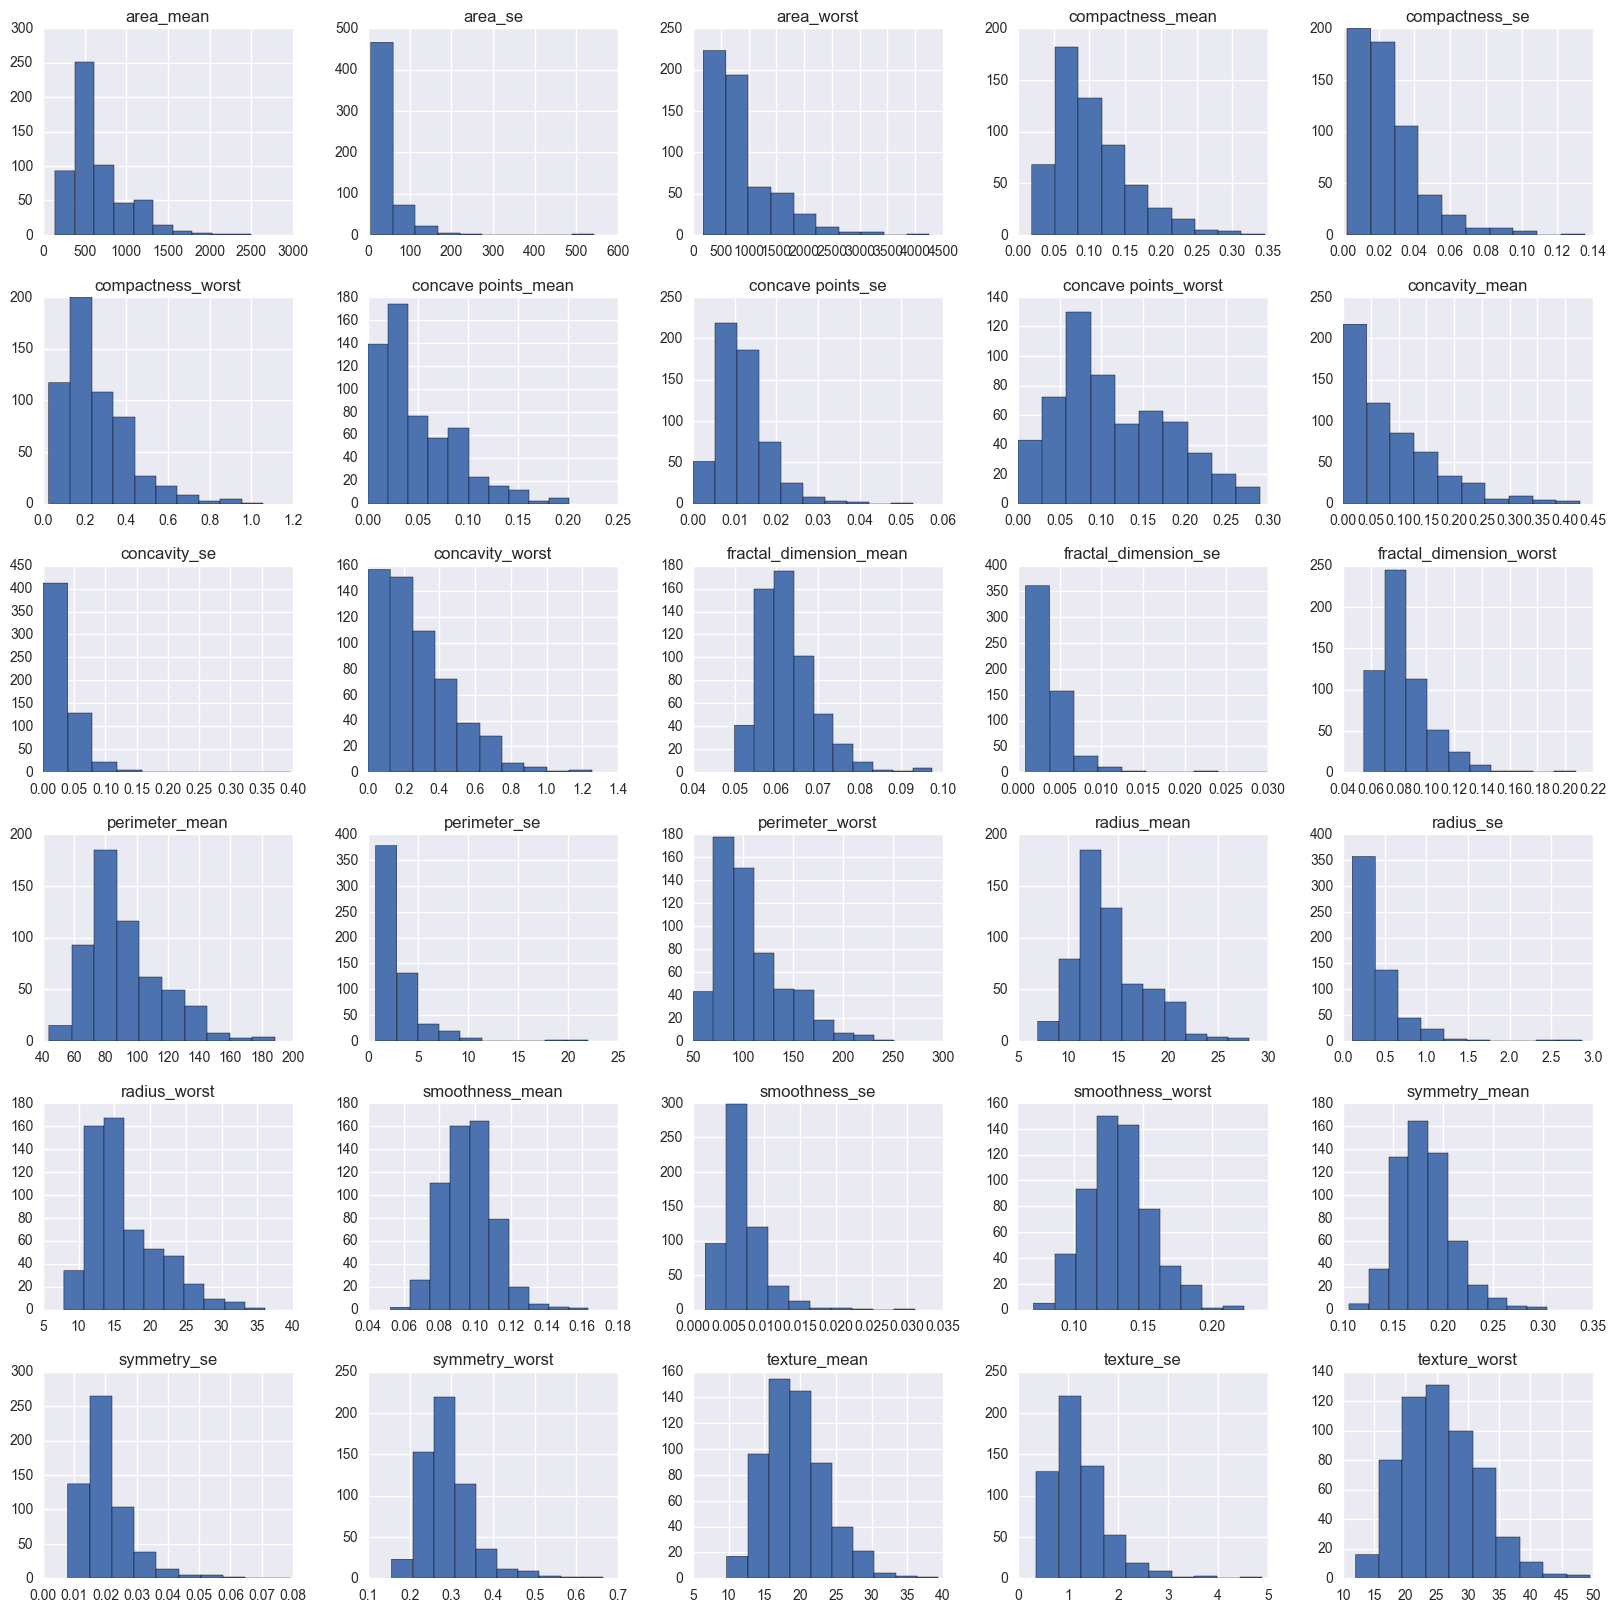

In [11]:
bc.hist(figsize = (20,20))

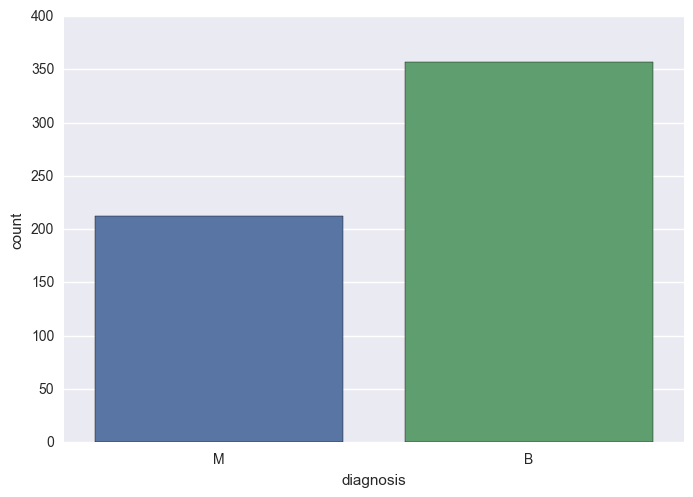

In [12]:
sb.countplot(bc['diagnosis'], label = 'Count')

In [13]:
#Mapping 'diagnosis-  object type to integer
bc['diagnosis']=bc['diagnosis'].map({'M':1,'B':0})

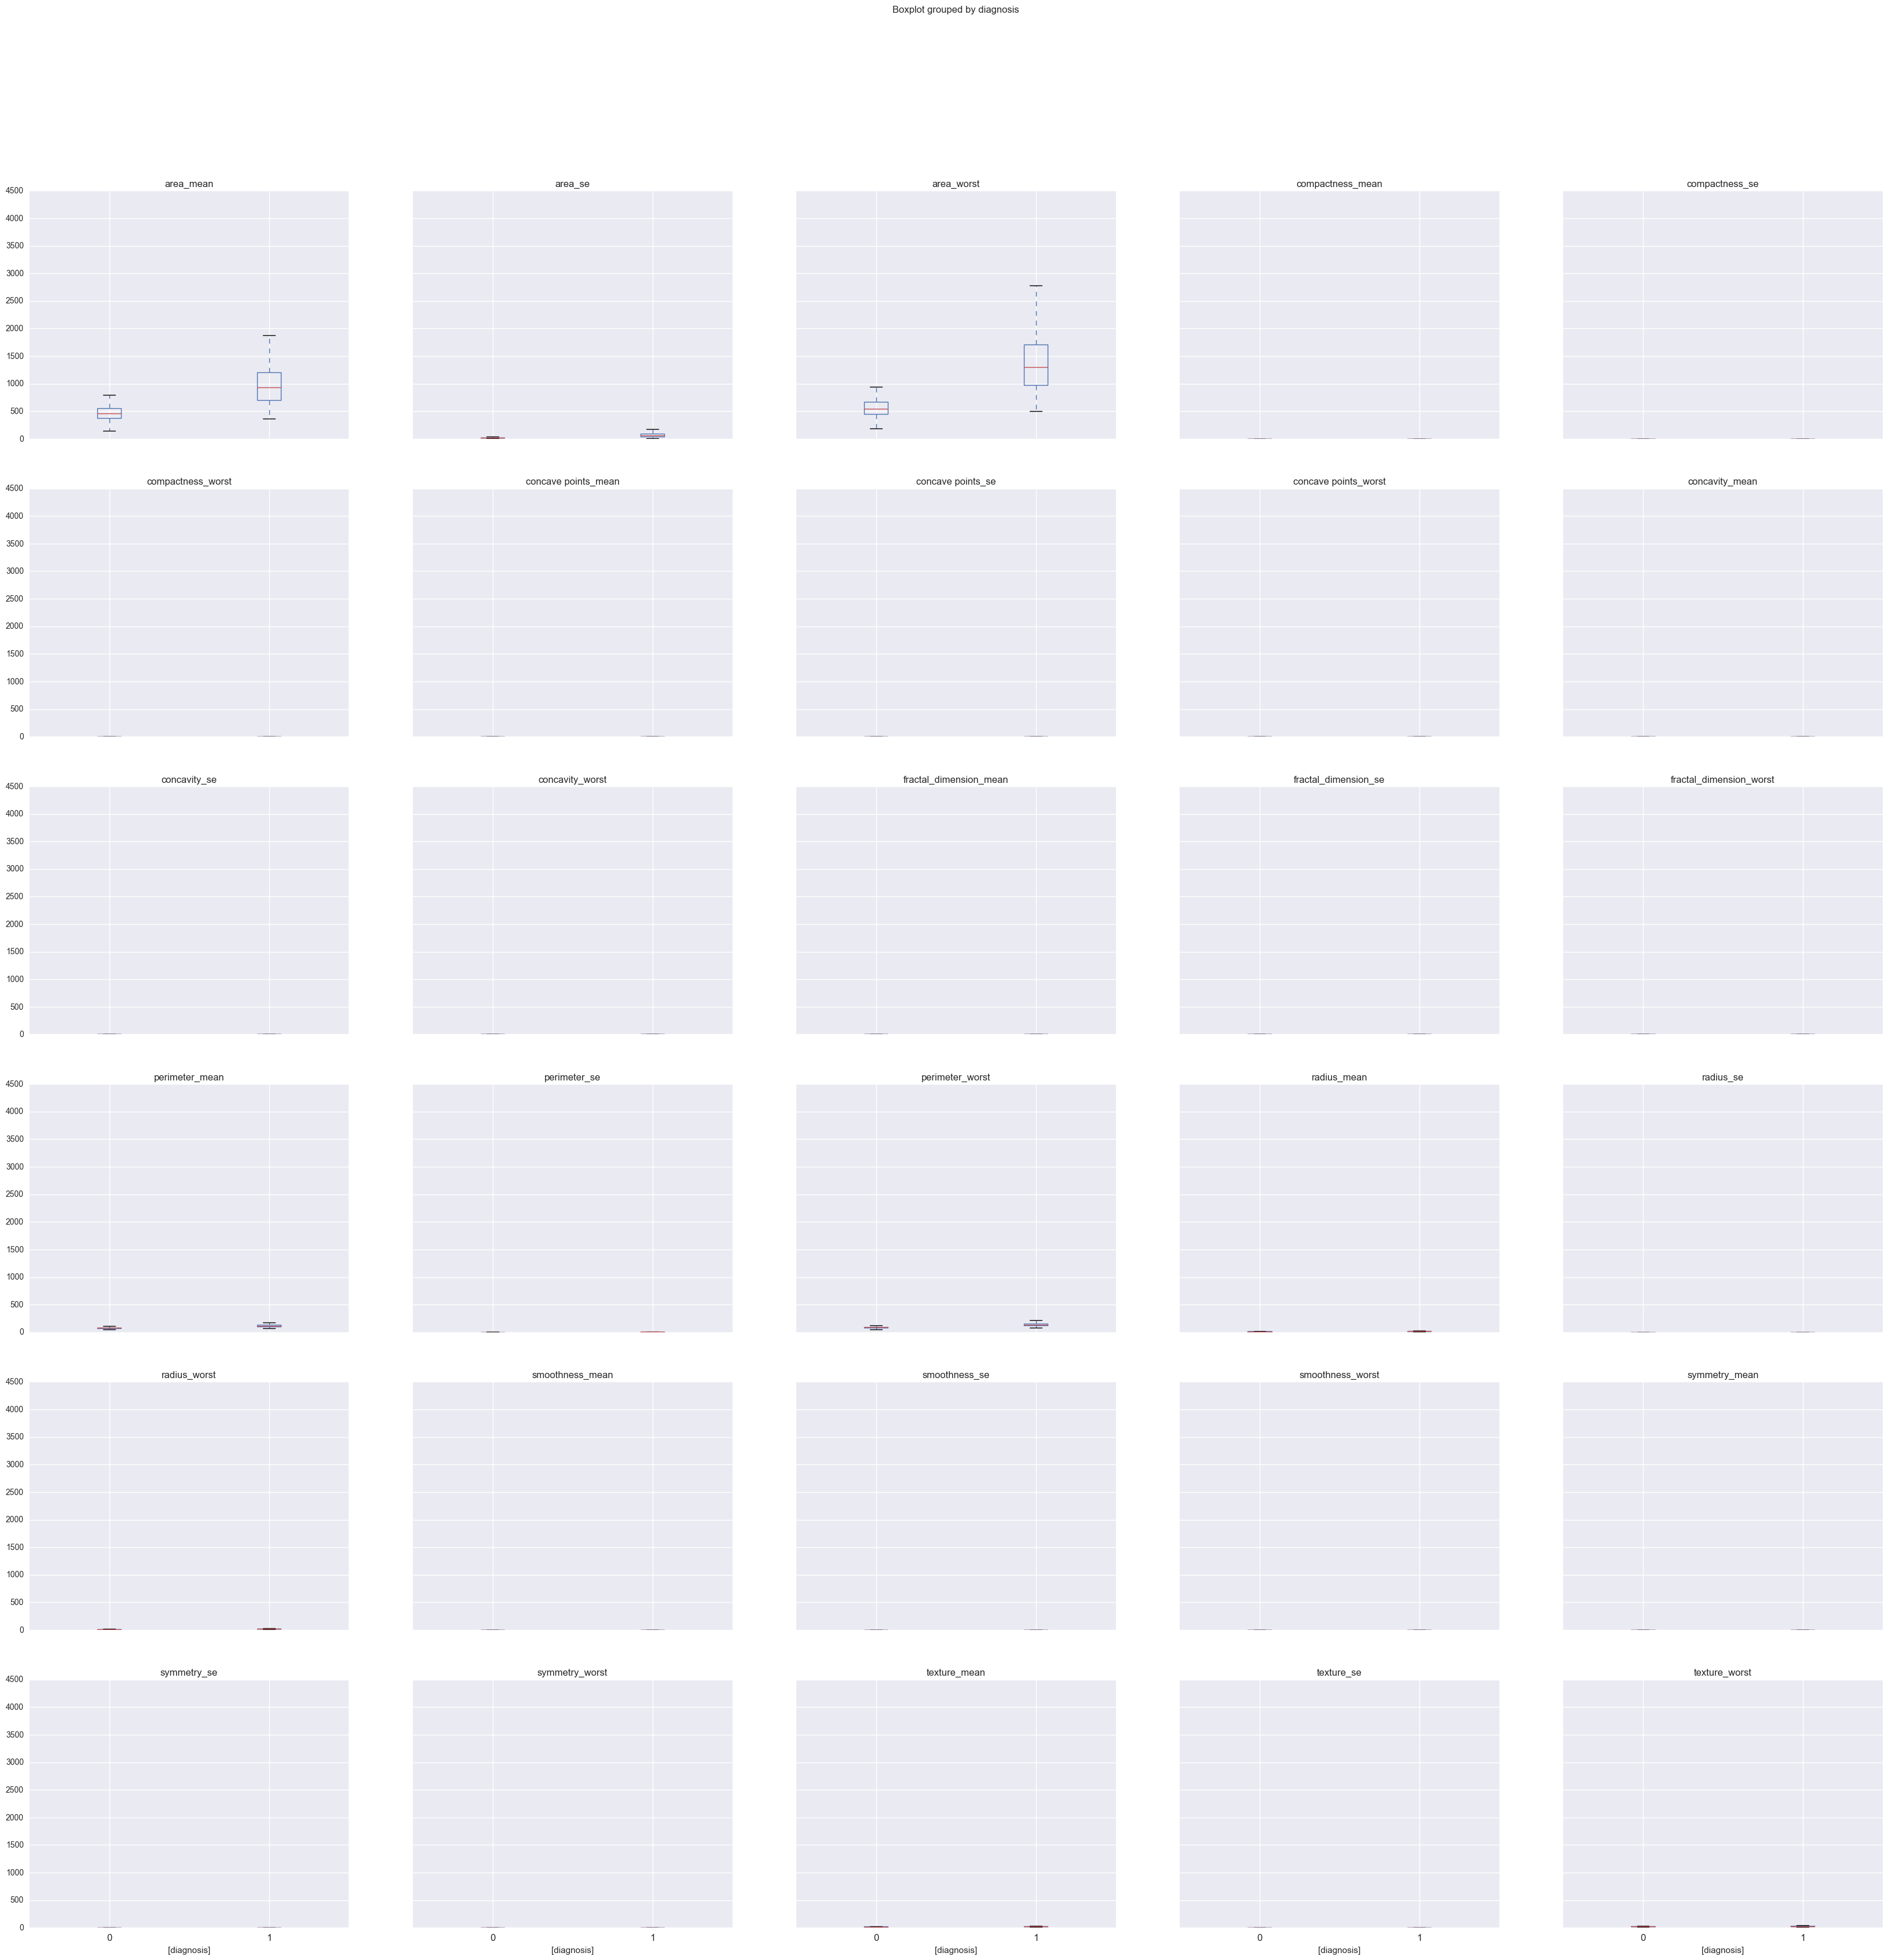

In [14]:
bc.boxplot(by = 'diagnosis', figsize = (40, 40))
plt.show()

<h3> Finding Correlations

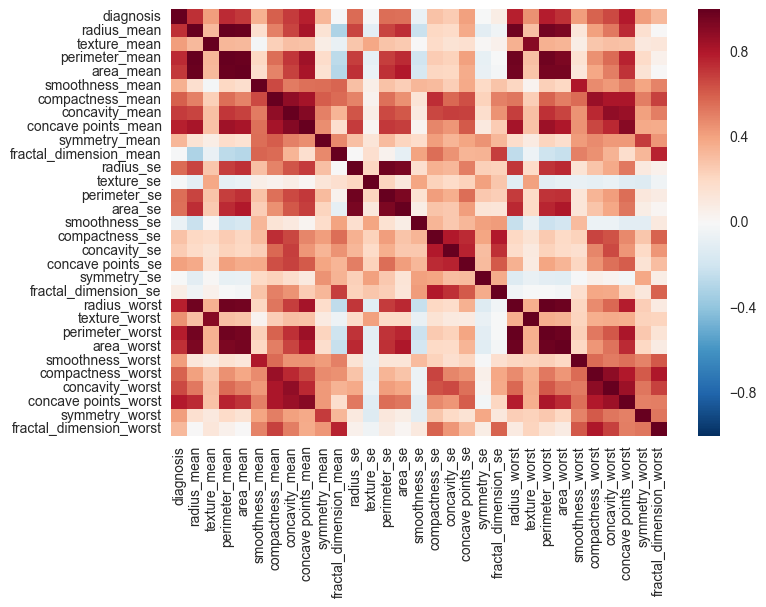

In [15]:
corr = bc.corr()
sb.heatmap(corr, xticklabels=corr.columns,
        yticklabels=corr.columns) 

<h3> Correlations with Diagnosis

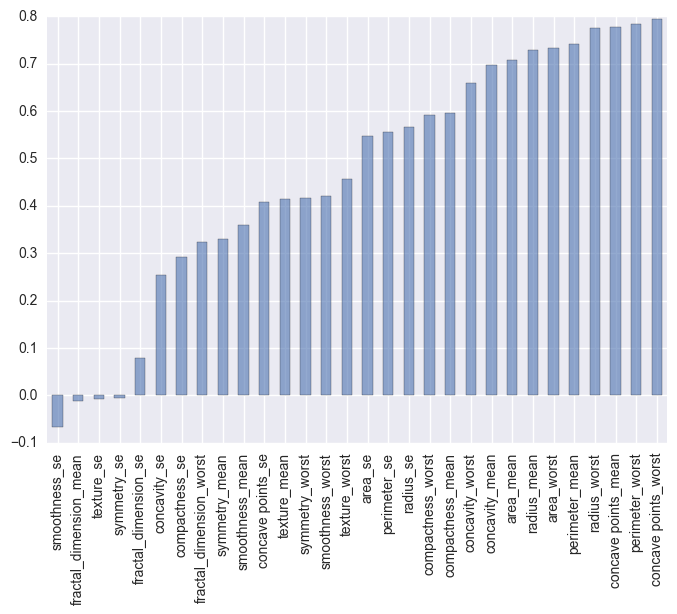

In [16]:
# Correlation to the diagnosis
cor = bc.corr()['diagnosis'].copy()
cor = cor.drop('diagnosis')
cor.sort_values(inplace=True)
cor.plot(kind='bar', alpha=0.6)

In [17]:
co = bc.corr()
co = co["diagnosis"] # how features are corelated to 'diagnosis' 
co = co.sort_values()
co = co.drop('diagnosis')
print(co)

smoothness_se             -0.067016
fractal_dimension_mean    -0.012838
texture_se                -0.008303
symmetry_se               -0.006522
fractal_dimension_se       0.077972
concavity_se               0.253730
compactness_se             0.292999
fractal_dimension_worst    0.323872
symmetry_mean              0.330499
smoothness_mean            0.358560
concave points_se          0.408042
texture_mean               0.415185
symmetry_worst             0.416294
smoothness_worst           0.421465
texture_worst              0.456903
area_se                    0.548236
perimeter_se               0.556141
radius_se                  0.567134
compactness_worst          0.590998
compactness_mean           0.596534
concavity_worst            0.659610
concavity_mean             0.696360
area_mean                  0.708984
radius_mean                0.730029
area_worst                 0.733825
perimeter_mean             0.742636
radius_worst               0.776454
concave points_mean        0

The mean, standard error and "worst" or largest (mean of the three largest values) of these features were computed for each image, resulting in 30 features. For instance, field 3 is Mean Radius, field 13 is Radius SE, field 23 is Worst Radius.
We will draw pairplots according to the categories - mean, se and worst

<h3>Pairplots for 'mean' category

In [18]:
radius_mean=bc['radius_mean']
texture_mean=bc['texture_mean']
perimeter_mean=bc['perimeter_mean']
area_mean=bc['area_mean']
smoothness_mean=bc['smoothness_mean']
compactness_mean=bc['compactness_mean']
concavity_mean=bc['concavity_mean']
concave_points_mean=bc['concave points_mean']
symmetry_mean=bc['symmetry_mean']


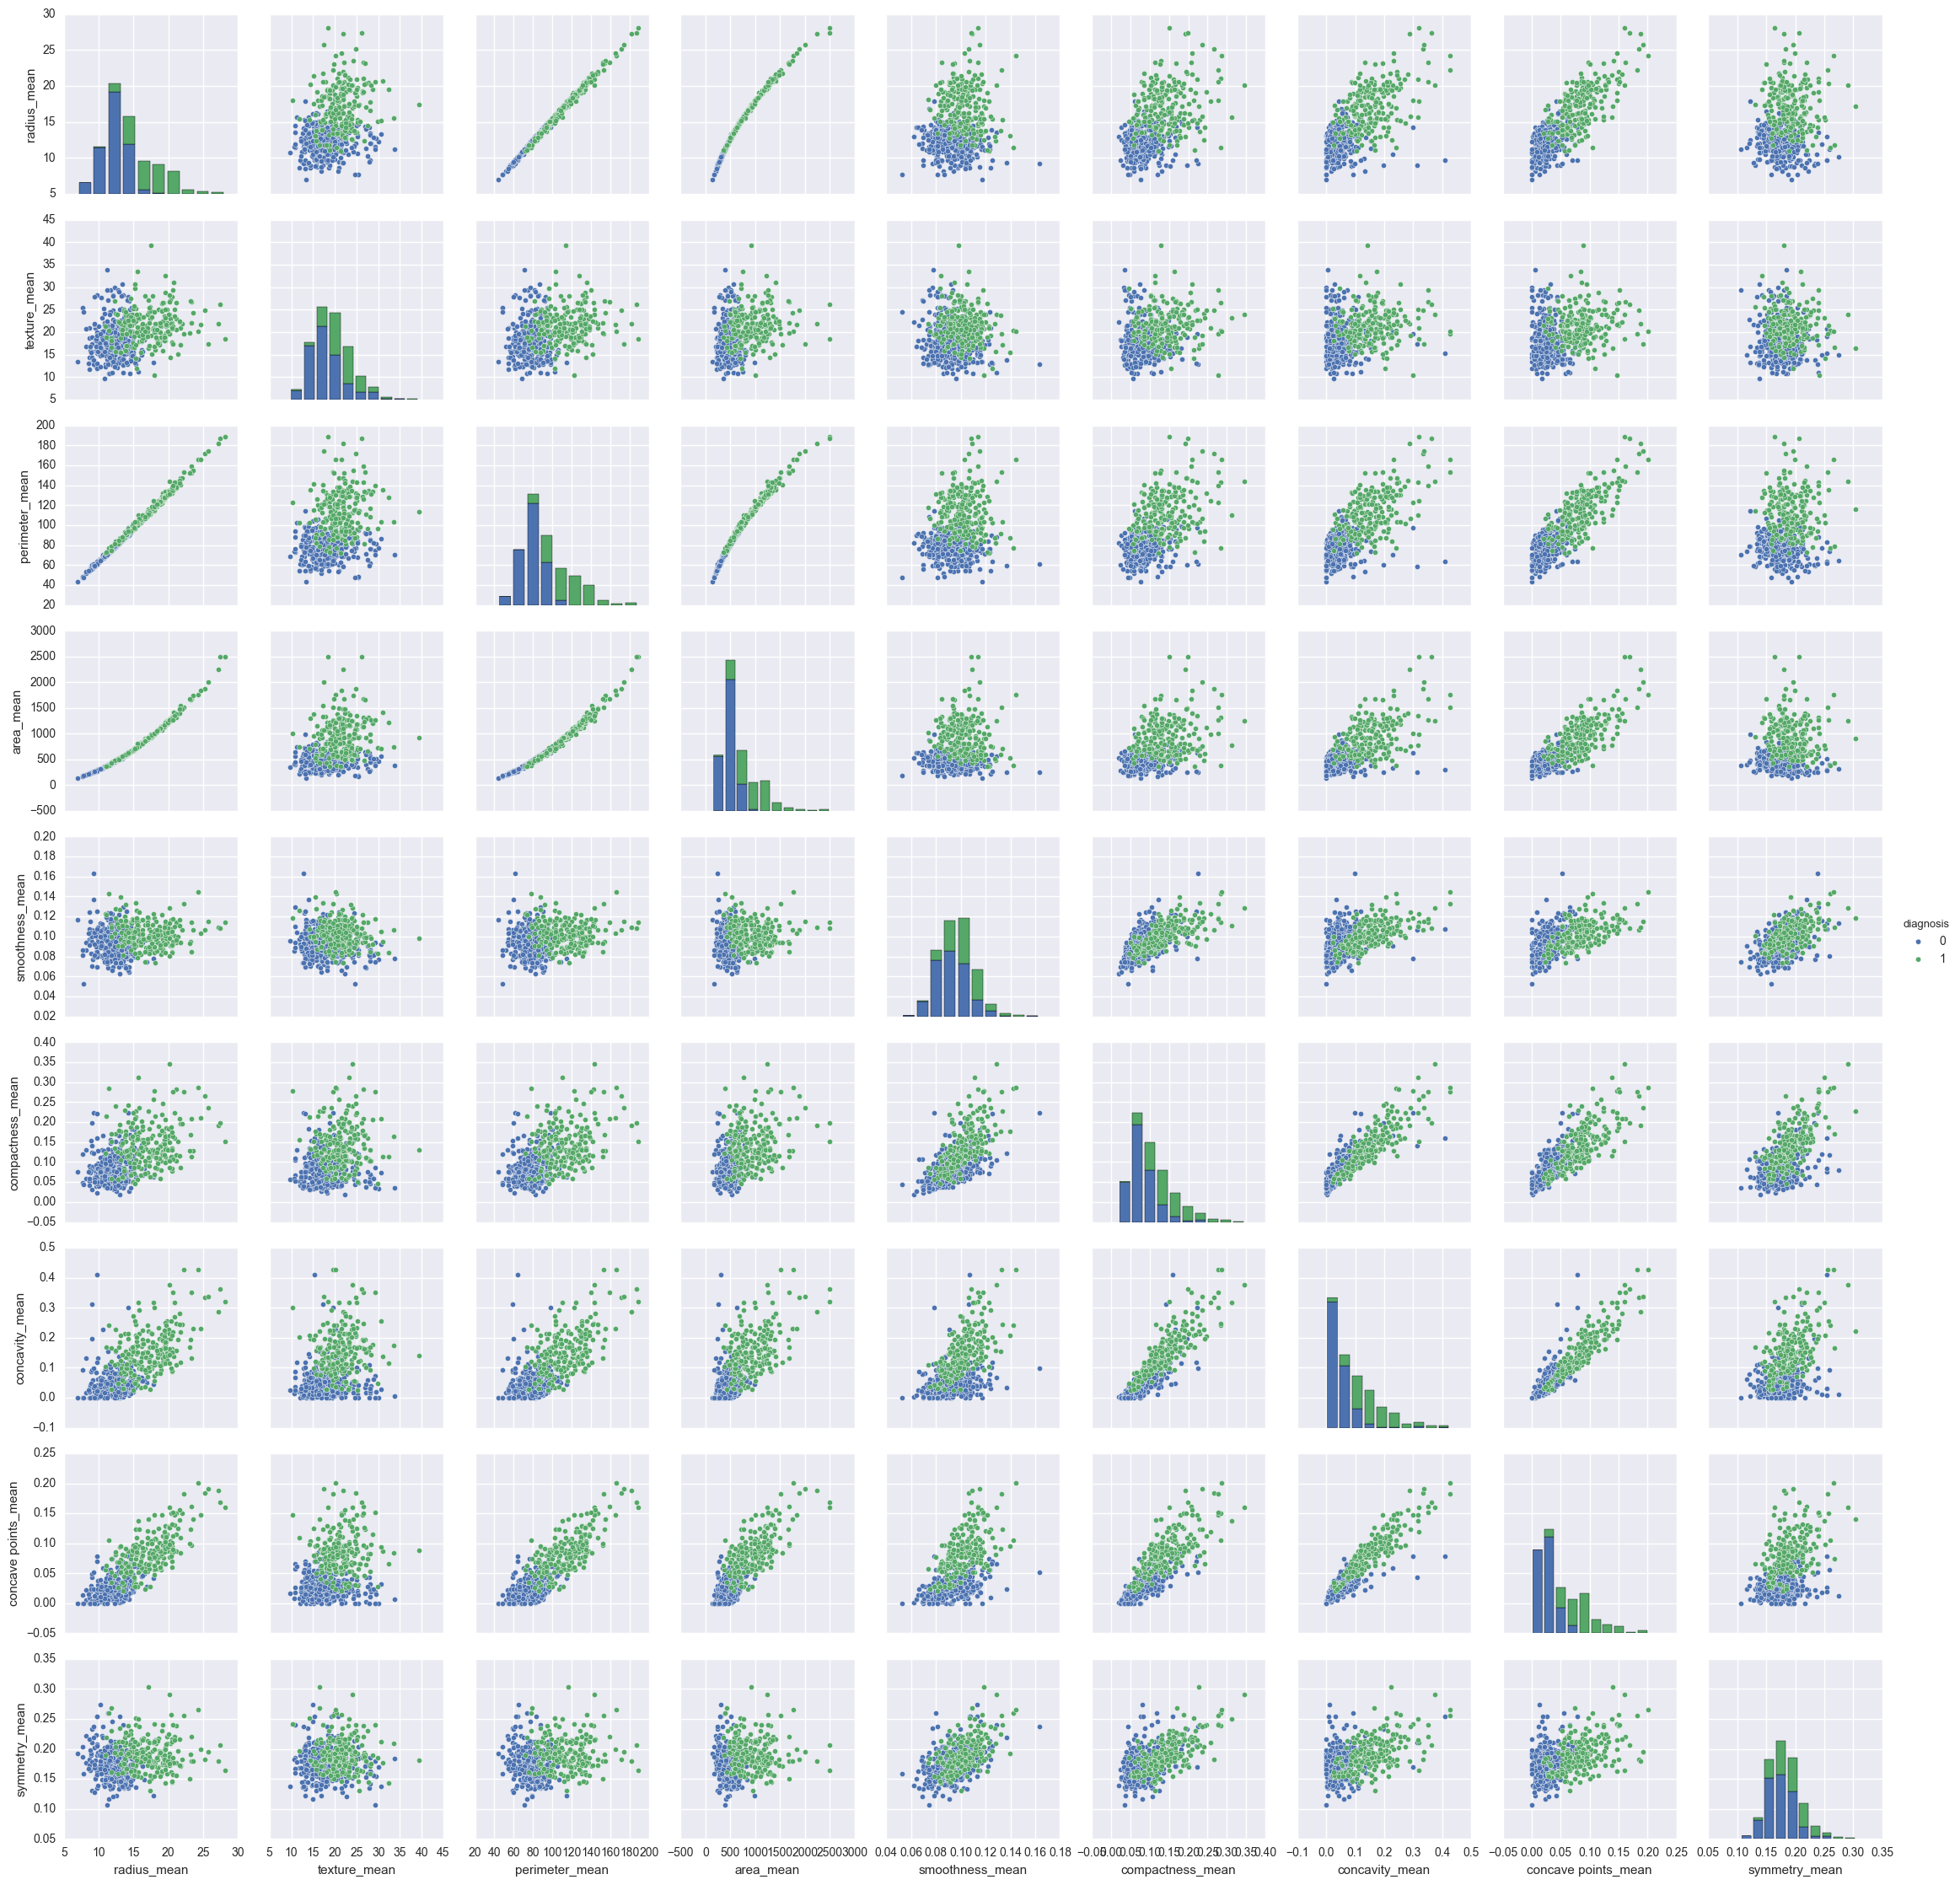

In [19]:
sb.pairplot(bc, hue="diagnosis", vars=['radius_mean','texture_mean','perimeter_mean','area_mean','smoothness_mean',
                                      'compactness_mean','concavity_mean', 'concave points_mean', 'symmetry_mean'])
plt.show()

<h3> Pairplots for 'se' category

In [20]:
radius_se=bc['radius_se']
texture_se=bc['texture_se']
perimeter_se=bc['perimeter_se']
area_se=bc['area_se']
smoothness_se=bc['smoothness_se']
compactness_se=bc['compactness_se']
concavity_se=bc['concavity_se']
concave_points_se=bc['concave points_se']
symmetry_se=bc['symmetry_se']


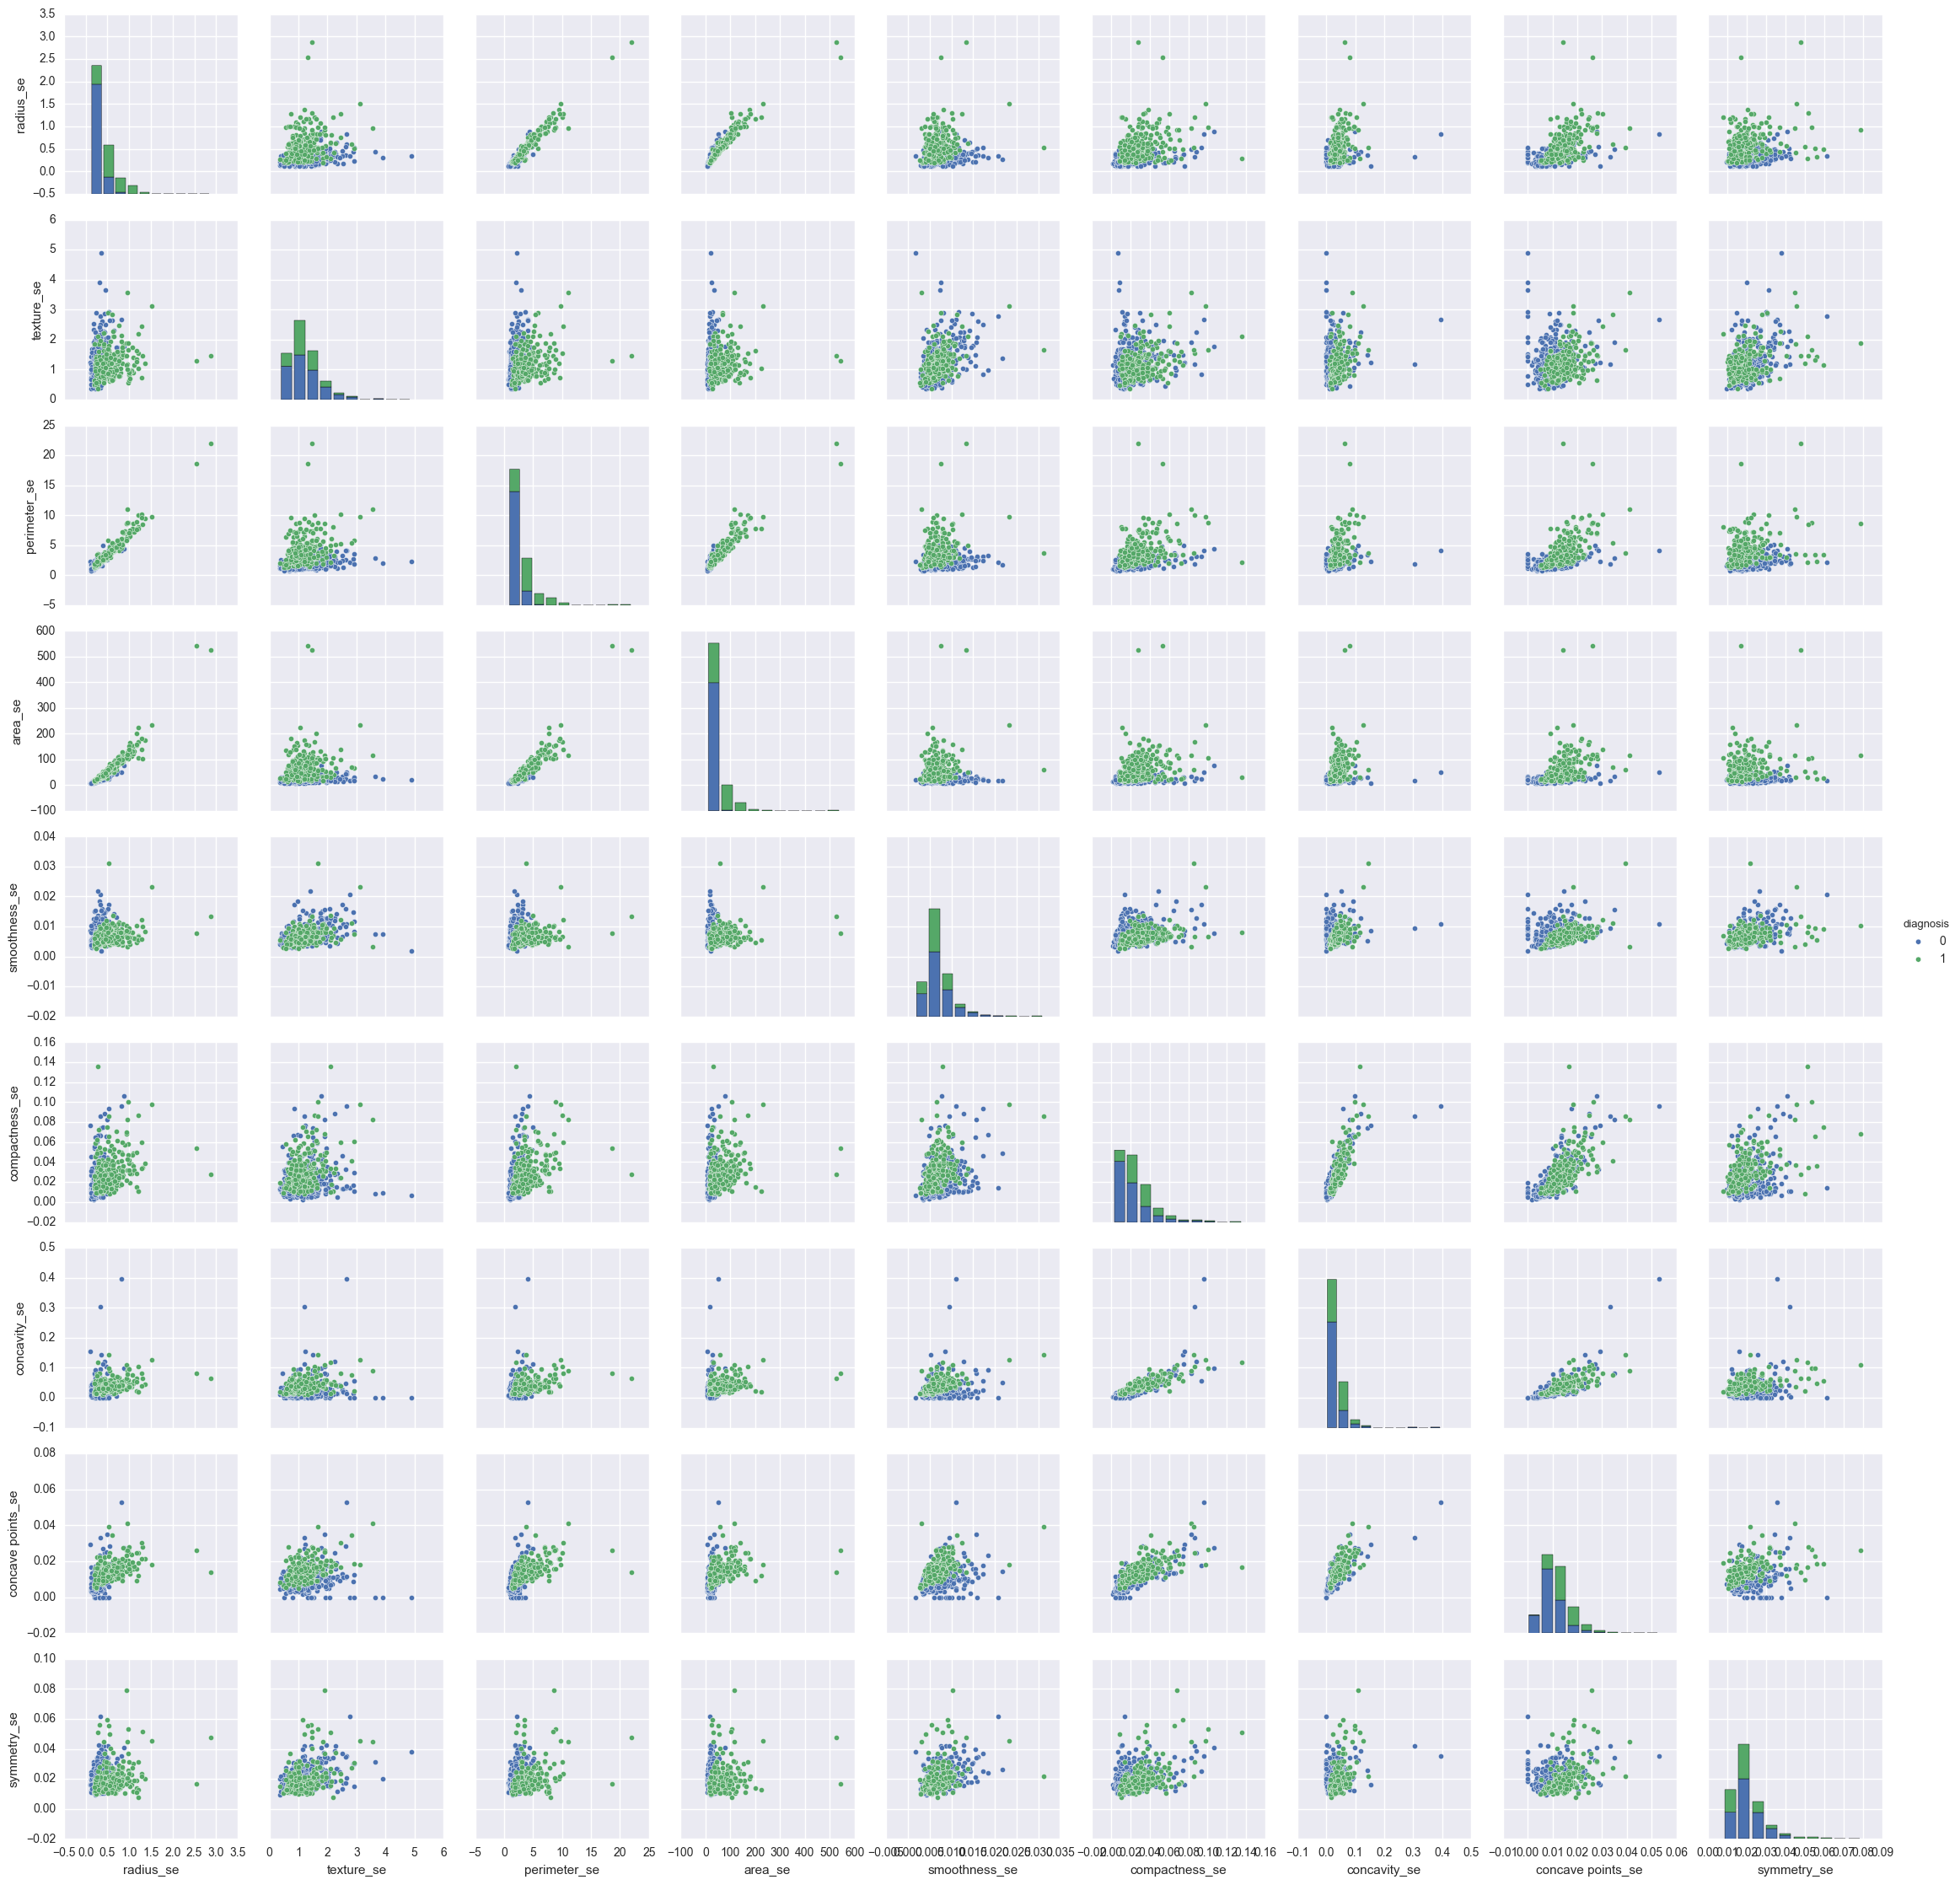

In [21]:
sb.pairplot(bc, hue="diagnosis", vars=['radius_se','texture_se','perimeter_se','area_se','smoothness_se',
                                      'compactness_se','concavity_se', 'concave points_se', 'symmetry_se'])
plt.show()

<h3>Pairplots for 'worst' category

In [22]:
radius_worst=bc['radius_worst']
texture_worst=bc['texture_worst']
perimeter_worst=bc['perimeter_worst']
area_worst=bc['area_worst']
smoothness_worst=bc['smoothness_worst']
compactness_worst=bc['compactness_worst']
concavity_worst=bc['concavity_worst']
concave_points_worst=bc['concave points_worst']
symmetry_worst=bc['symmetry_worst']


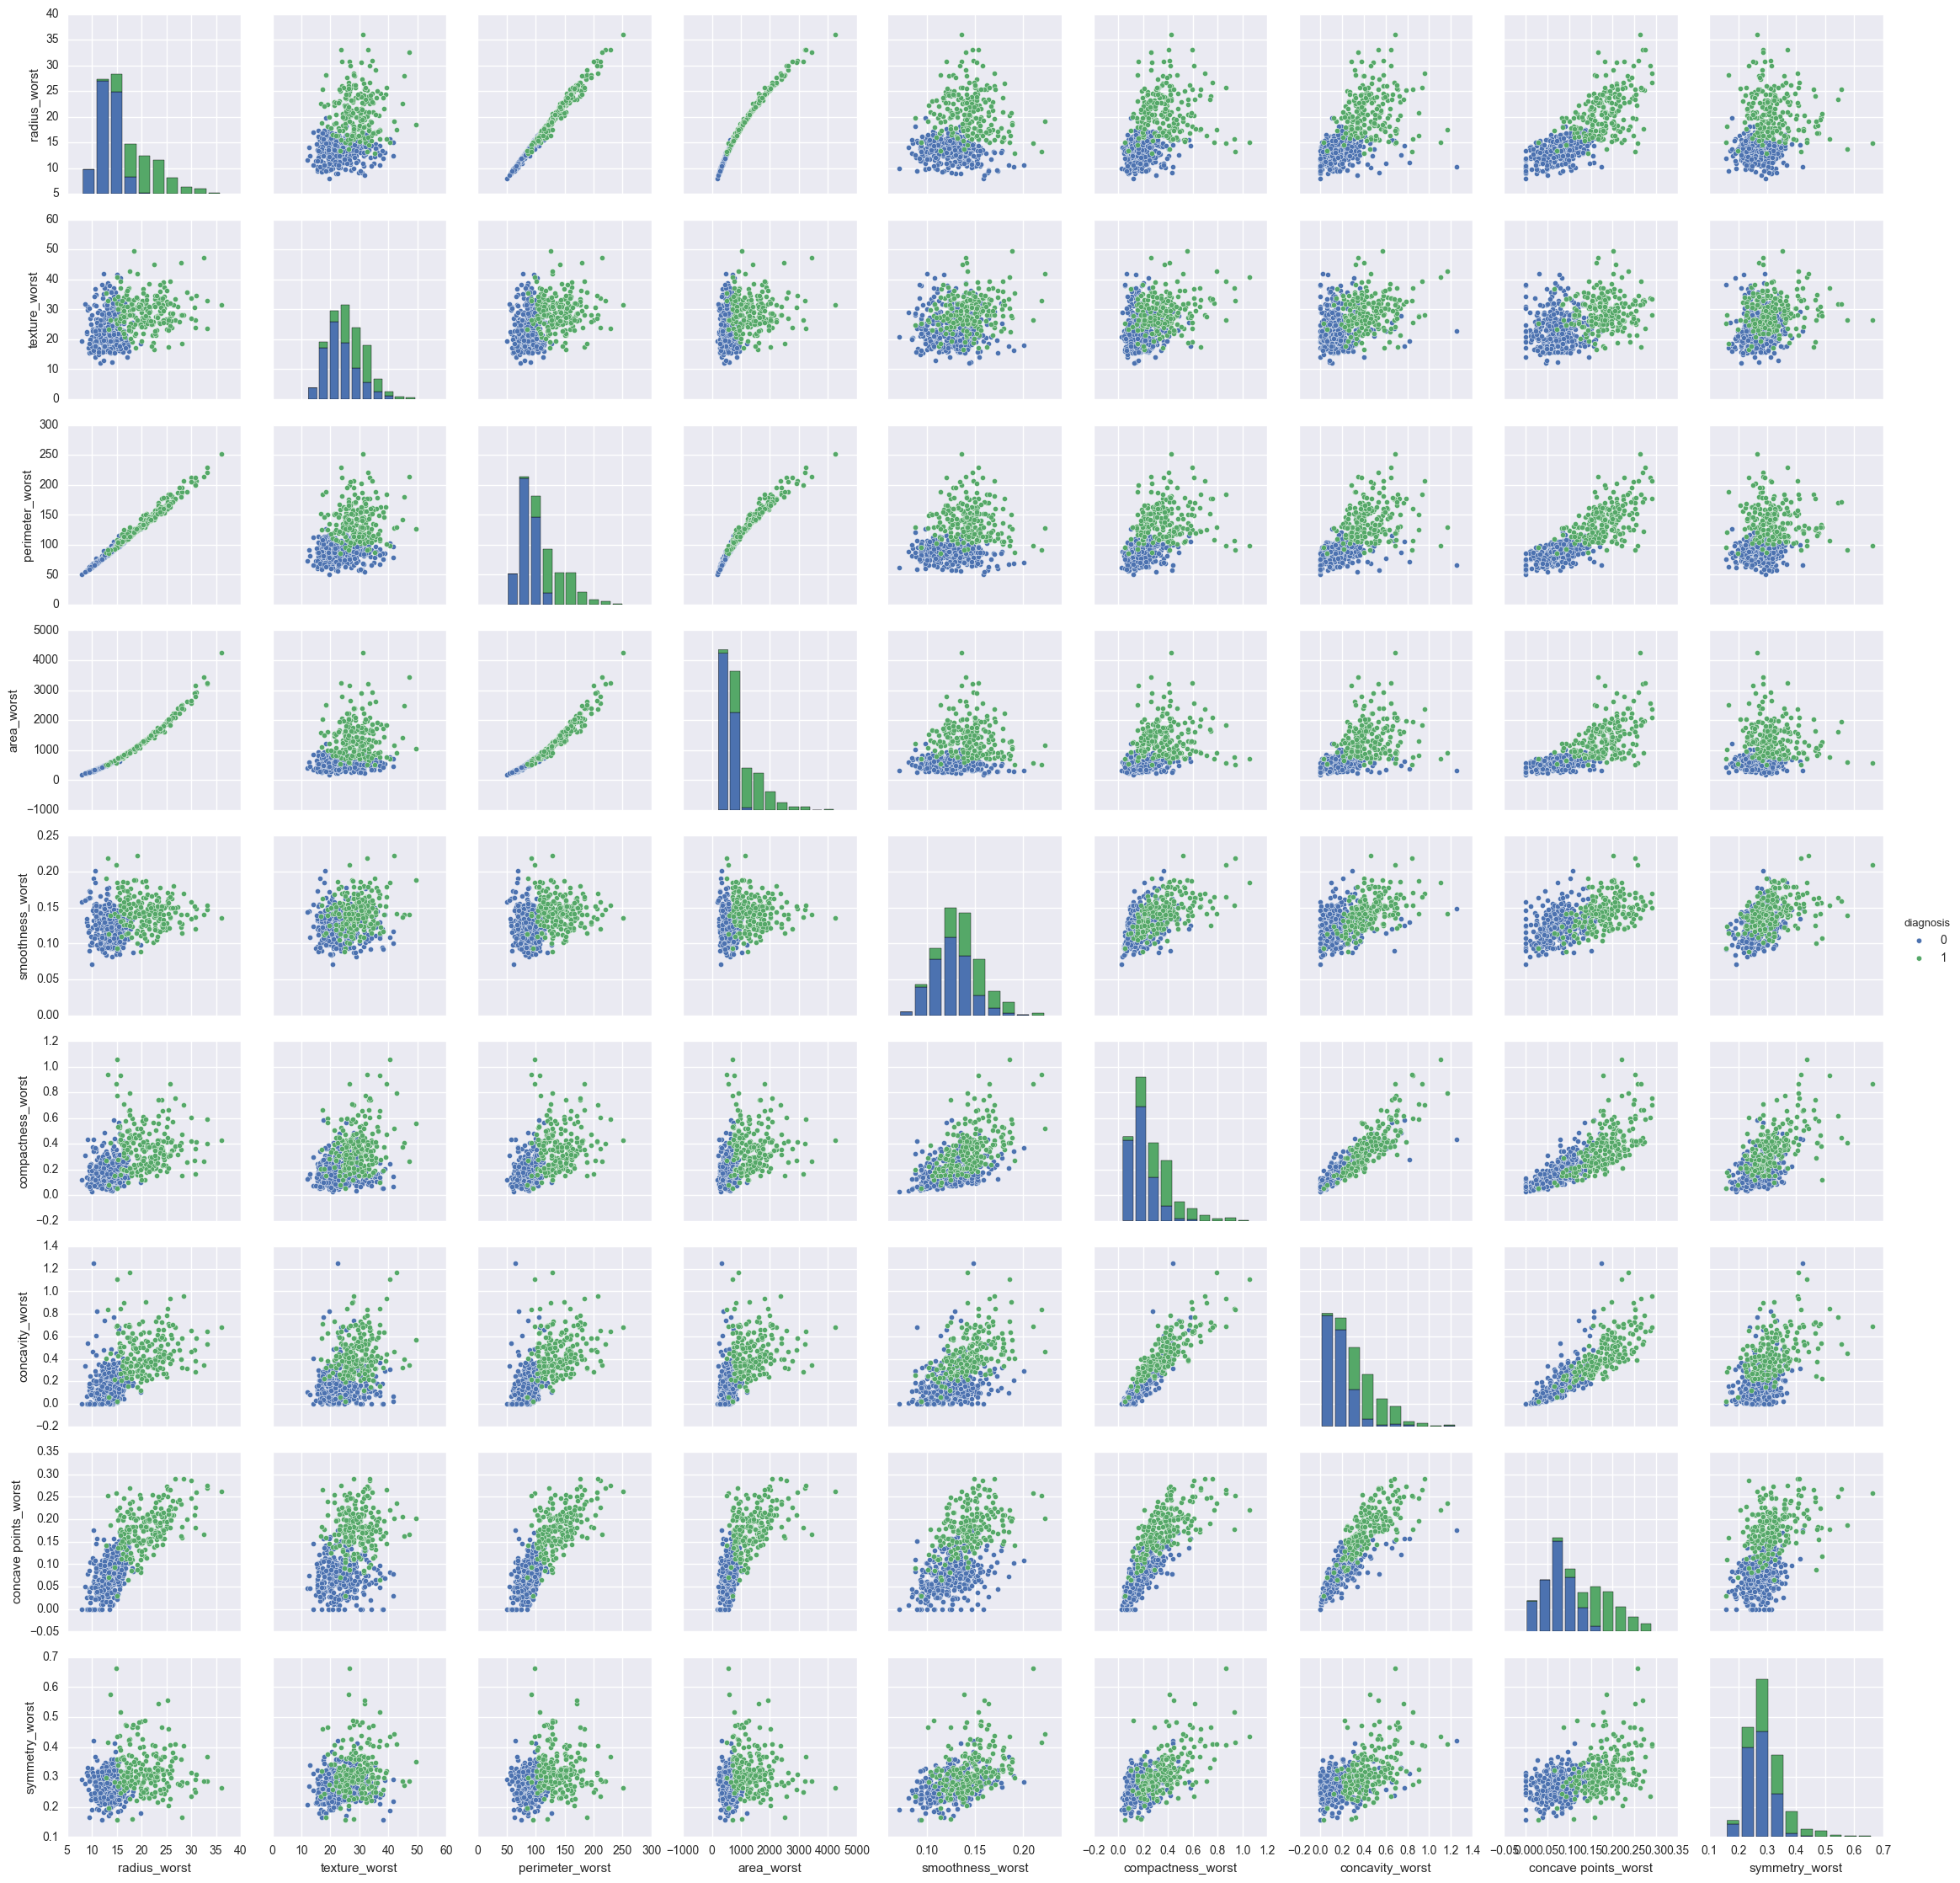

In [23]:
sb.pairplot(bc, hue="diagnosis", vars=['radius_worst','texture_worst','perimeter_worst','area_worst','smoothness_worst',
                                      'compactness_worst','concavity_worst', 'concave points_worst', 'symmetry_worst'])
plt.show()

 Based on the correlation with diagnosis values I chose all the features that scored more than 0.50. They are the following:

area_se, perimeter_se, radius_se, compactness_worst, compactness_mean, concavity_worst, concavity_mean, area_mean,
radius_mean, area_worst, perimeter_mean, radius_worst, concave points_mean, perimeter_worst, concave points_worst


Boxplots of these newly selected 15 features against 'diagnosis'

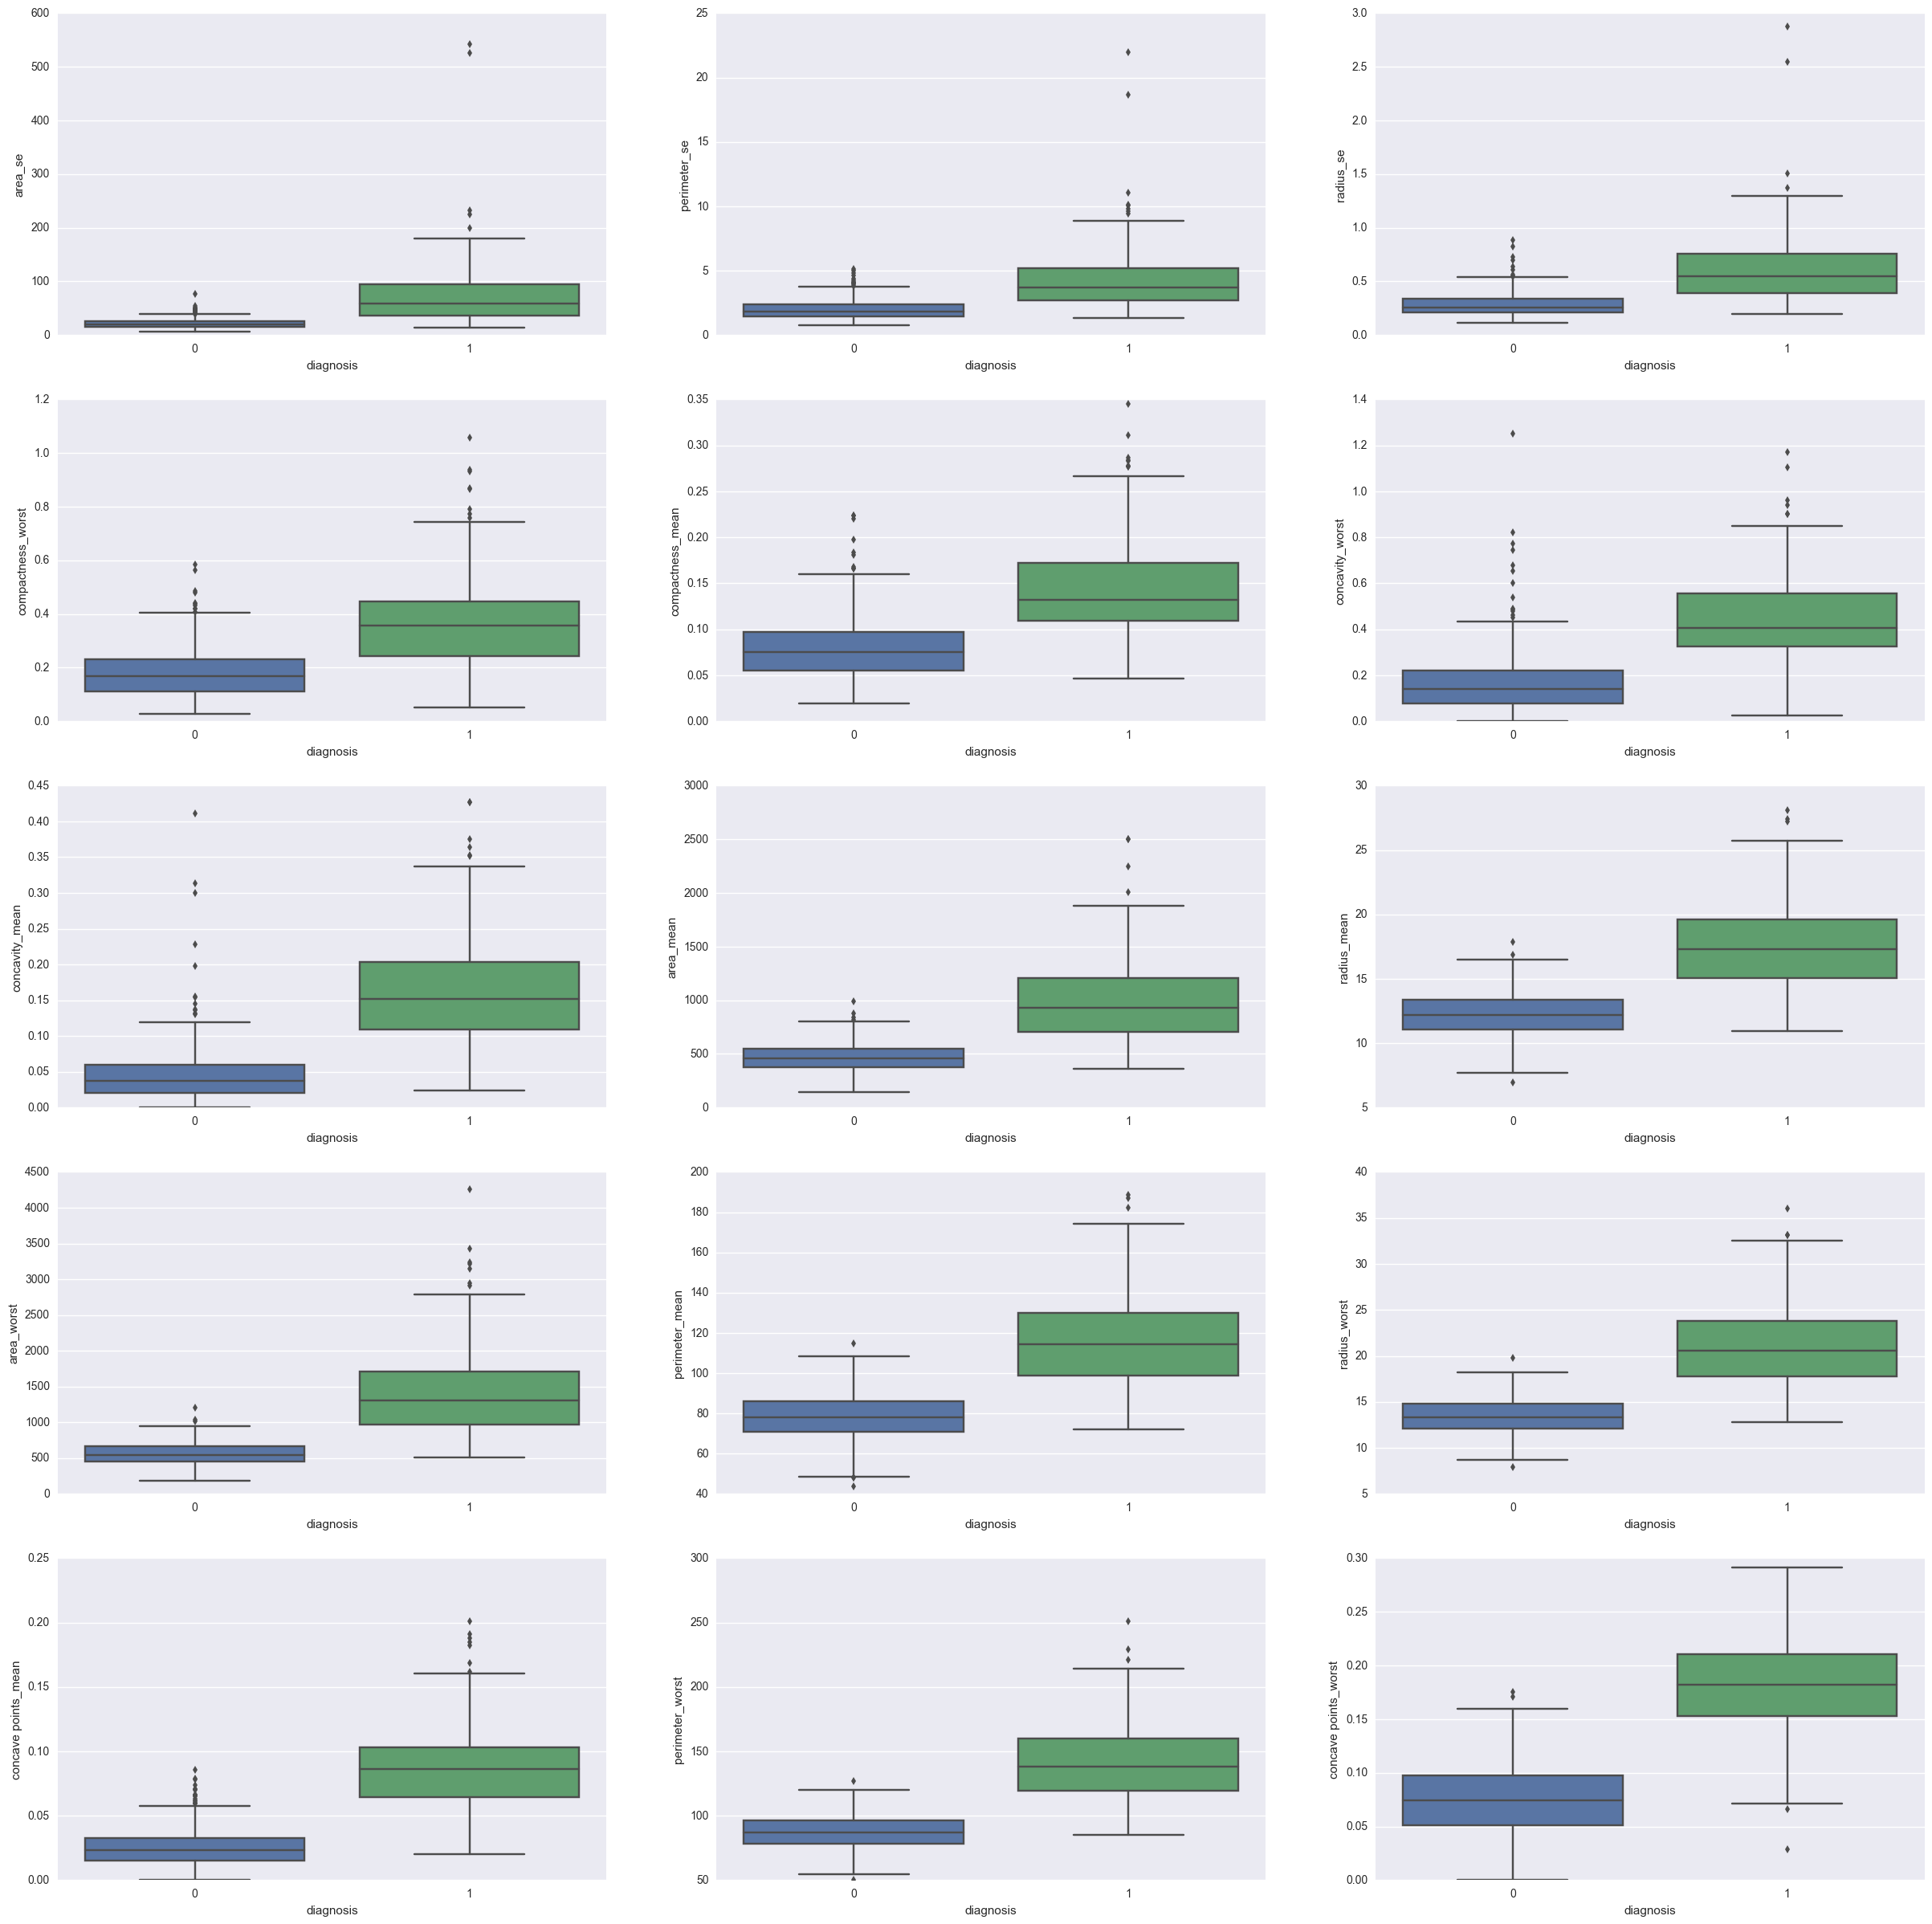

In [24]:

fig = plt.figure(figsize=(30,30))
ax1 = fig.add_subplot(5,3,1)
ax2 = fig.add_subplot(5,3,2)
ax3 = fig.add_subplot(5,3,3)
ax4 = fig.add_subplot(5,3,4)
ax5 = fig.add_subplot(5,3,5)
ax6 = fig.add_subplot(5,3,6)
ax7 = fig.add_subplot(5,3,7)
ax8 = fig.add_subplot(5,3,8)
ax9 = fig.add_subplot(5,3,9)
ax10 = fig.add_subplot(5,3,10)
ax11 = fig.add_subplot(5,3,11)
ax12 = fig.add_subplot(5,3,12)
ax13 = fig.add_subplot(5,3,13)
ax14 = fig.add_subplot(5,3,14)
ax15 = fig.add_subplot(5,3,15)
sb.boxplot(data=bc, x="diagnosis", y="area_se", ax = ax1)
sb.boxplot(data=bc, x="diagnosis", y="perimeter_se",ax = ax2)
sb.boxplot(data=bc, x="diagnosis", y="radius_se", ax = ax3)
sb.boxplot(data=bc, x="diagnosis", y="compactness_worst", ax = ax4)
sb.boxplot(data=bc, x="diagnosis", y="compactness_mean", ax = ax5)
sb.boxplot(data=bc, x="diagnosis", y="concavity_worst", ax = ax6)
sb.boxplot(data=bc, x="diagnosis", y="concavity_mean",ax = ax7)
sb.boxplot(data=bc, x="diagnosis", y="area_mean", ax = ax8)
sb.boxplot(data=bc, x="diagnosis", y="radius_mean", ax = ax9)
sb.boxplot(data=bc, x="diagnosis", y="area_worst", ax = ax10)
sb.boxplot(data=bc, x="diagnosis", y="perimeter_mean", ax = ax11)
sb.boxplot(data=bc, x="diagnosis", y="radius_worst",ax = ax12)
sb.boxplot(data=bc, x="diagnosis", y="concave points_mean", ax = ax13)
sb.boxplot(data=bc, x="diagnosis", y="perimeter_worst", ax = ax14)
sb.boxplot(data=bc, x="diagnosis", y="concave points_worst", ax = ax15)
plt.show()

<h1>Feature Selection and Scaling

In [25]:
features_list = ['area_se', 'perimeter_se', 'radius_se', 'compactness_worst', 'compactness_mean', 'concavity_worst', 'concavity_mean', 'area_mean',
'radius_mean', 'area_worst', 'perimeter_mean', 'radius_worst', 'concave points_mean', 'perimeter_worst', 'concave points_worst'
]

In [26]:

train, test = train_test_split(bc, test_size = 0.3)
print(train.shape)
print(test.shape)

(398, 31)
(171, 31)


In [27]:

train_X = train[features_list] 
train_y=train.diagnosis

test_X= test[features_list] 
test_y =test.diagnosis   

In [28]:

model=RandomForestClassifier(n_estimators=100)

In [29]:
model.fit(train_X,train_y)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=1,
            min_samples_split=2, min_weight_fraction_leaf=0.0,
            n_estimators=100, n_jobs=1, oob_score=False, random_state=None,
            verbose=0, warm_start=False)

In [30]:
predictions=model.predict(test_X)

In [31]:
metrics.accuracy_score(predictions,test_y)

0.94152046783625731

In [32]:
featimp = pd.Series(model.feature_importances_, index=features_list).sort_values(ascending=False)
print(featimp) 

perimeter_worst         0.180672
concave points_worst    0.143793
concave points_mean     0.113445
radius_worst            0.107118
concavity_mean          0.090193
area_worst              0.077774
concavity_worst         0.067250
radius_mean             0.057181
perimeter_mean          0.052500
area_se                 0.031214
area_mean               0.021978
compactness_worst       0.019973
perimeter_se            0.014717
radius_se               0.011802
compactness_mean        0.010389
dtype: float64


In [33]:
def model(model,bc,predictions,outcome):
  
    kf = KFold(bc.shape[0], n_folds=10) 

In [34]:
def classification_model(model,data,prediction_input,output):
    
    #Fit the model:
    model.fit(data[prediction_input],data[output]) 
    #Make predictions on training set:
    predictions = model.predict(data[prediction_input])
  
    #Print accuracy
    # now checkin accuracy for same data
    accuracy = metrics.accuracy_score(predictions,data[output])
    print("Accuracy : %s" % "{0:.3%}".format(accuracy))
 
    
    kf = KFold(data.shape[0], n_folds=5)
   
    error = []
    for train, test in kf:
        
        train_X = (data[prediction_input].iloc[train,:])
        train_y = data[output].iloc[train]
        model.fit(train_X, train_y)
    
        test_X=data[prediction_input].iloc[test,:]
        test_y=data[output].iloc[test]
        error.append(model.score(test_X,test_y))
       
        print("Cross-Validation Score : %s" % "{0:.3%}".format(np.mean(error)))
    

In [35]:
model = RandomForestClassifier(n_estimators=100)
output = 'diagnosis'
classification_model(model,bc,features_list,output)

Accuracy : 100.000%
Cross-Validation Score : 89.474%
Cross-Validation Score : 90.789%
Cross-Validation Score : 93.275%
Cross-Validation Score : 93.640%
Cross-Validation Score : 94.381%


100% Accuracy indicates overfitting. Cross validation scores are better.

In [36]:
model = svm.SVC()

classification_model(model,bc,features_list,output)

Accuracy : 100.000%
Cross-Validation Score : 40.351%
Cross-Validation Score : 48.684%
Cross-Validation Score : 54.094%
Cross-Validation Score : 59.211%
Cross-Validation Score : 62.767%


In [37]:
model = KNeighborsClassifier()
classification_model(model,bc,features_list,output)

Accuracy : 94.552%
Cross-Validation Score : 85.088%
Cross-Validation Score : 88.596%
Cross-Validation Score : 91.228%
Cross-Validation Score : 92.105%
Cross-Validation Score : 92.445%


In [38]:
model = RandomForestClassifier(n_estimators=100)
classification_model(model,bc,features_list,output)

Accuracy : 100.000%
Cross-Validation Score : 89.474%
Cross-Validation Score : 91.667%
Cross-Validation Score : 93.567%
Cross-Validation Score : 94.079%
Cross-Validation Score : 94.732%


In [39]:
model=LogisticRegression()
classification_model(model,bc,features_list,output)

Accuracy : 95.431%
Cross-Validation Score : 88.596%
Cross-Validation Score : 91.667%
Cross-Validation Score : 92.690%
Cross-Validation Score : 93.860%
Cross-Validation Score : 93.849%


I am leaning more towards KNeighbors. Next, I will be using GridSearchCV to check out the models.

In [40]:
data_X= bc[features_list]
data_y= bc["diagnosis"]

# Use Kappa_scorer as a metric to evaluate 
kappa_scorer = make_scorer(cohen_kappa_score)

In [41]:

def Classification_model_gridsearchCV(model,param_grid,data_X,data_y):
    clf = GridSearchCV(model,param_grid,cv=10,scoring=kappa_scorer)
    
    clf.fit(train_X,train_y)
    print("The best parameter is :")

    print(clf.best_params_)
    print("The best estimator is ")
    print(clf.best_estimator_)
    print("The best score is ")
  
    print(clf.best_score_)
    

In [42]:
param_grid = {'max_features': ['auto', 'sqrt', 'log2'],
              'min_samples_split': [2,3,4,5,6,7,8,9,10], 
              'min_samples_leaf':[2,3,4,5,6,7,8,9,10] }

<h6> Decision Tree with GridSearchCV

In [43]:
model= DecisionTreeClassifier()
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter is :
{'max_features': 'sqrt', 'min_samples_split': 8, 'min_samples_leaf': 7}
The best estimator is 
DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features='sqrt', max_leaf_nodes=None,
            min_impurity_split=1e-07, min_samples_leaf=7,
            min_samples_split=8, min_weight_fraction_leaf=0.0,
            presort=False, random_state=None, splitter='best')
The best score is 
0.885545938772


<h6> KNeighbors with GridSearchCV

In [44]:
model = KNeighborsClassifier()

k_range = list(range(1, 30))
leaf_size = list(range(1,30))
weight_options = ['uniform', 'distance']
param_grid = {'n_neighbors': k_range, 'leaf_size': leaf_size, 'weights': weight_options}
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter is :
{'n_neighbors': 9, 'weights': 'distance', 'leaf_size': 1}
The best estimator is 
KNeighborsClassifier(algorithm='auto', leaf_size=1, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=9, p=2,
           weights='distance')
The best score is 
0.867898935548


<h6>SVM with GridSearchCV

In [45]:
model=svm.SVC()
param_grid = [
              {'C': [1, 10, 100, 1000], 
               'kernel': ['linear']
              },
              {'C': [1, 10, 100, 1000], 
               'gamma': [0.001, 0.0001], 
               'kernel': ['rbf']
              },
 ]
Classification_model_gridsearchCV(model,param_grid,data_X,data_y)

The best parameter is :
{'kernel': 'linear', 'C': 1000}
The best estimator is 
SVC(C=1000, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape=None, degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
The best score is 
0.880455052758


<h6>RandomForest with GridSearchCV

In [46]:
model = RandomForestClassifier(random_state=42)
param_grid = {"max_depth": [3, None],
              #"max_features": sp_randint(1, 11),
              #"min_samples_split": sp_randint(2, 11),
              #"min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}
rand = GridSearchCV(model,  param_grid, scoring = None, cv = None)
rand.fit(train_X,train_y)
print("The best parameter is :")

print(rand.best_params_)
print("The best estimator is ")
print(rand.best_estimator_)
print("The best score is ")
  
print(rand.best_score_)
    

The best parameter is :
{'bootstrap': False, 'criterion': 'entropy', 'max_depth': None}
The best estimator is 
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=None, max_features='auto',
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
The best score is 
0.949748743719


<h6> Random Forest with RandomizedSearchCV

In [47]:
model = RandomForestClassifier(random_state=42)
# specify parameters and distributions to sample from
param_grid = {"max_depth": [3, None],
              "max_features": sp_randint(1, 11),
              "min_samples_split": sp_randint(2, 11),
              "min_samples_leaf": sp_randint(1, 11),
              "bootstrap": [True, False],
              "criterion": ["gini", "entropy"]}         
              
rand = RandomizedSearchCV(model, param_distributions = param_grid, n_iter=100, random_state=42)
rand.fit(train_X,train_y)
print("The best parameter is :")

print(rand.best_params_)
print("The best estimator is ")
print(rand.best_estimator_)
print("The best score is ")
  
print(rand.best_score_)


The best parameter is :
{'bootstrap': False, 'min_samples_leaf': 1, 'min_samples_split': 2, 'criterion': 'entropy', 'max_features': 3, 'max_depth': 3}
The best estimator is 
RandomForestClassifier(bootstrap=False, class_weight=None,
            criterion='entropy', max_depth=3, max_features=3,
            max_leaf_nodes=None, min_impurity_split=1e-07,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)
The best score is 
0.947236180905


In [48]:
prediction=rand.predict(test_X)

In [49]:
prediction = pd.Series(prediction)

# False positives.
fp_filter = (prediction == 1) & (bc["diagnosis"] == 0)
fp = len(prediction[fp_filter])

# True positives.
tp_filter = (prediction == 1) & (bc["diagnosis"] == 1)
tp = len(prediction[tp_filter])

# False negatives.
fn_filter = (prediction == 0) & (bc["diagnosis"] == 1)
fn = len(prediction[fn_filter])

# True negatives
tn_filter = (prediction == 0) & (bc["diagnosis"] == 0)
tn = len(prediction[tn_filter])

# Rates
tpr = tp / (tp + fn)
fpr = fp / (fp + tn)

print(tpr)
print(fpr)

0
0


In [50]:
prediction = pd.Series(prediction)

In [51]:
# False positives.
fp_filter = (prediction == 1) & (bc["diagnosis"] == 0)
fp = len(prediction[fp_filter])
fp

29

In [52]:
# True positives.
tp_filter = (prediction == 1) & (bc["diagnosis"] == 1)
tp = len(prediction[tp_filter])
tp

37

In [53]:
# False negatives.
fn_filter = (prediction == 0) & (bc["diagnosis"] == 1)
fn = len(prediction[fn_filter])
fn

52

In [54]:
# True negatives
tn_filter = (prediction == 0) & (bc["diagnosis"] == 0)
tn = len(prediction[tn_filter])
tn

53

In [55]:
# Rates

tpr = (float(tp) / (tp + fn)) # True Positive Rate, Recall, Sensitivity
fpr = (float(fp) / (fp + tn)) # False Positive rate or fall-out
ppv = (float(tp) / (tp + fp)) #Post Predicitive value, Precision
fnr = (float(fn) / (fn + tp)) #False Negative Rate or miss-rate
F1_score = (float(2*tp)) / ((2*tp) + fp + fn)


In [56]:
print("The Recall is:", tpr)
print("The False Positive Rate is:", fpr)
print("The Presicion is:", ppv)
print("The False negative or miss-rate is:", fnr)
print("The F1_score is:", F1_score)           

('The Recall is:', 0.4157303370786517)
('The False Positive Rate is:', 0.35365853658536583)
('The Presicion is:', 0.5606060606060606)
('The False negative or miss-rate is:', 0.5842696629213483)
('The F1_score is:', 0.4774193548387097)
